In [1]:
'''
改变的地方：
1 增加list读入全部evoked数据，
2 都要进行baseline更新
3 grand average合并成一个evoked，每种条件变成一个evoked
4 plot compare
'''

'\n改变的地方：\n1 增加list读入全部evoked数据，\n2 都要进行baseline更新\n3 grand average合并成一个evoked，每种条件变成一个evoked\n4 plot compare\n'

In [3]:
## 被试应该是从 6 开始。
import os.path as op
import mne
from mne.preprocessing import ICA
from mne.event import define_target_events
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np
import os
import mne
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs,
                               corrmap)



T1_sub_ids = [
            'prex006','prex009','prex010','prex011','prex012',
            'prex015','prex016','prex017','prex018','prex019','prex022','prex023',
            'prex024','prex026','prex027','prex028','prex029']
#去掉了 5和9被试
T2M_sub_ids = [
            'prex006M','prex009M','prex010M','prex011M','prex012M',
            'prex015M','prex016M','prex017M','prex018M','prex019M','prex022M','prex023M',
            'prex024M','prex026M','prex027M','prex028M','prex029M']

T2S_sub_ids = [
            'prex006S','prex009S','prex010S','prex011S','prex012S',
            'prex015S','prex016S','prex017S','prex018S','prex019S','prex022S','prex023S',
            'prex024S','prex026S','prex027S','prex028S','prex029S'
            ]

T1_sub_ids = ['prex006']
T2M_sub_ids = ['prex006M']
T2S_sub_ids = ['prex006S']

T1_sub_ids = [
            'prex006','prex009','prex010','prex011','prex012',
            'prex015','prex016','prex017','prex018','prex019','prex022','prex023',
            'prex026','prex027','prex028'
            ,'prex033','prex037','prex038','prex040',
            'prex041','prex042','prex044','prex045',
            'prex046','prex047','prex048','prex049','prex050','prex052',
            'prex034','prex043','prex035'
            ]
#去掉了 5和9被试
T2M_sub_ids = [
            'prex006M','prex009M','prex010M','prex011M','prex012M',
            'prex015M','prex016M','prex017M','prex018M','prex019M','prex022M','prex023M',
            'prex026M','prex027M','prex028M'
            ,'prex033M','prex037M','prex038M','prex040S'
             ,'prex041M','prex042M','prex044M','prex045M'
             ,'prex046M','prex047M','prex048M','prex049S','prex050M','prex052M',
            'prex034M','prex043M','prex035M'
            ]

T2S_sub_ids = [
            'prex006S','prex009S','prex010S','prex011S','prex012S',
            'prex015S','prex016S','prex017S','prex018S','prex019S','prex022S','prex023S',
            'prex026S','prex027S','prex028S'
            ,'prex033S','prex037S','prex038S','prex040M'
            ,'prex041S','prex042S','prex044S','prex045S'
            ,'prex046S','prex047S','prex048S','prex049M','prex050S','prex052S',
            'prex034S','prex043S','prex035S'
            ]
data_path = 'E:\Python LYW\RSA\spaced_learning\pre10\\analysis\data\\7evoked\\'

In [4]:
list_evoked_T1S = list()
list_evoked_T2S = list()
list_evoked_T2M = list()

for sub_id in T1_sub_ids:
    fname = data_path + sub_id + '-ave.fif'
    evoked = mne.read_evokeds(fname)[0]
    list_evoked_T1S.append(evoked)

for sub_id in T2S_sub_ids:
    fname = data_path + sub_id + '-ave.fif'
    evoked = mne.read_evokeds(fname)[0]
    list_evoked_T2S.append(evoked)

for sub_id in T2M_sub_ids:
    fname = data_path + sub_id + '-ave.fif'
    evoked = mne.read_evokeds(fname)[0]
    list_evoked_T2M.append(evoked)

Reading E:\Python LYW\RSA\spaced_learning\pre10\analysis\data\7evoked\prex006-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (101)
        0 CTF compensation matrices available
        nave = 48 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] sec)
Reading E:\Python LYW\RSA\spaced_learning\pre10\analysis\data\7evoked\prex009-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (101)
        0 CTF compensation matrices available
        nave = 39 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading E:\Python LYW\RSA\spaced_learning\pre10\analysis\data\7evoked\prex010-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (101)
        0 CTF compensation matrices available
        nave = 

Identifying common channels ...
Identifying common channels ...
Identifying common channels ...


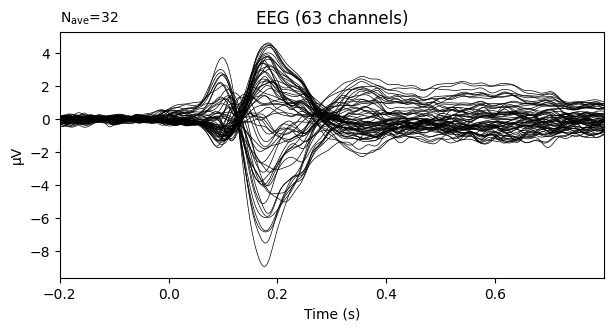

In [5]:
# 组平均

grand_average_T1S = mne.grand_average(list_evoked_T1S)
grand_average_T1S.comment = 'T1S'
grand_average_T1S.plot()

grand_average_T2S = mne.grand_average(list_evoked_T2S)
grand_average_T2S.comment = 'T2S'
grand_average_T2S.plot()

grand_average_T2M = mne.grand_average(list_evoked_T2M)
grand_average_T2M.comment = 'T2M'
grand_average_T2M.plot()


In [6]:
grand_average_all = list()
grand_average_all= [grand_average_T1S,grand_average_T2S,grand_average_T2M]

conds = ('T1S','T2S','T2M')
evks = dict(zip(conds,grand_average_all))


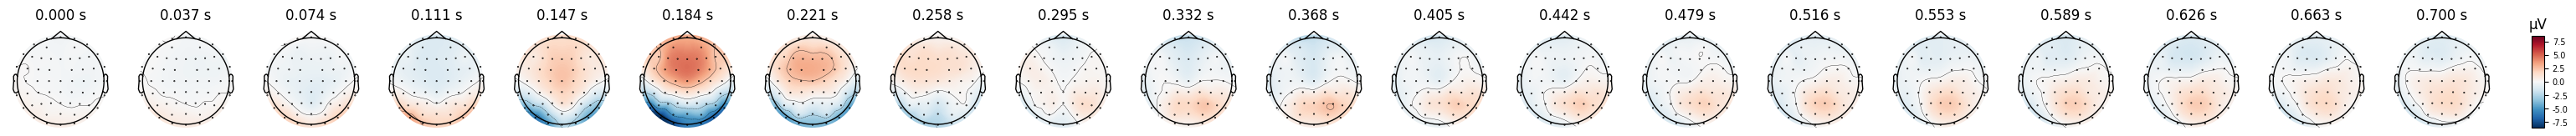

In [6]:
%matplotlib qt
drop_chan = ['FT9','TP9','FT10','TP10']
times = np.linspace(0,0.7,20)
evks['T1S'].copy().drop_channels(drop_chan).plot_topomap(times=times)
evks['T2S'].copy().drop_channels(drop_chan).plot_topomap(times=times)
evks['T2M'].copy().drop_channels(drop_chan).plot_topomap(times=times)

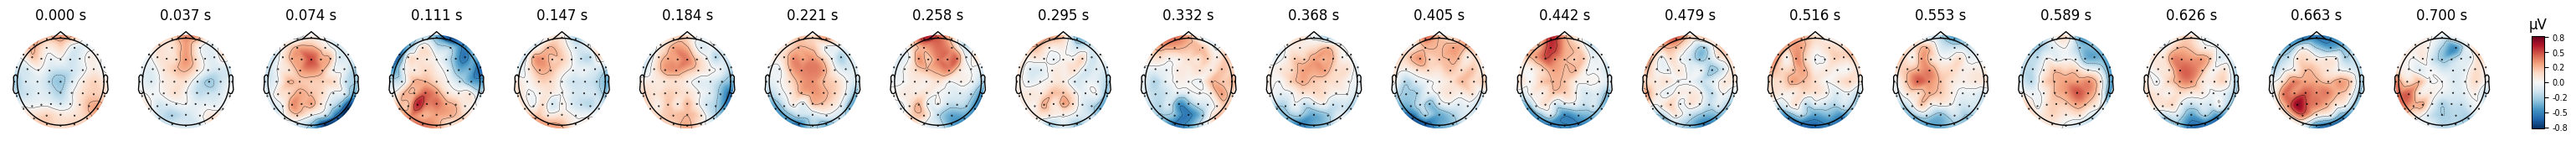

In [7]:
#直接做一个差异波+地形图
times = np.linspace(0,0.7,20)
diff_evoked = evks['T1S'].copy()
diff_evoked.data = (evks['T2S'].data - evks['T2M'].data )
drop_chan = ['FT9','TP9','FT10','TP10']
diff_evoked = diff_evoked.drop_channels(drop_chan)
diff_evoked.plot_topomap(times=times)

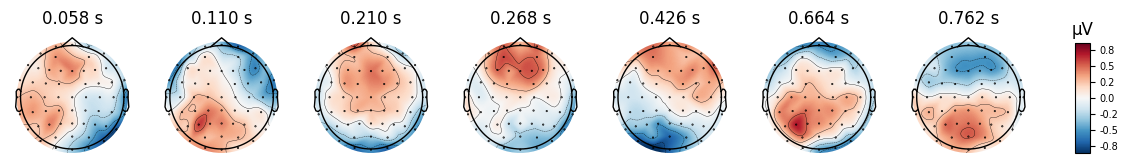

In [8]:
#直接做一个差异波+地形图
#能用平均值做吗？
#换参考电极有没有变化呢？
times = np.linspace(0.4,0.7,20)
diff_evoked = evks['T1S'].copy()
diff_evoked.data = (evks['T2S'].data - evks['T2M'].data)
drop_chan = ['FT9','TP9','FT10','TP10']
diff_evoked = diff_evoked.drop_channels(drop_chan)
diff_evoked.plot_topomap(times='peaks')

In [9]:
# 做个动态图？
times = np.linspace(0,0.7,100)
fig , anim = evks['T1S'].animate_topomap(times = times,time_unit='s', blit=False)

In [10]:
# Cz附近的点。
picks=['Cz']
# mne.viz.plot_compare_evokeds(evoked_S1_baseline,picks=picks,combine='std')
# 猜：取所有channel中的最大值，和其他的取均值什么的相对应。
def custom_func(x):
    return x.max(axis=1)

for combine in ('mean', 'median', 'gfp', custom_func):
    mne.viz.plot_compare_evokeds(evks, picks=picks, combine=combine)

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


C:\Users\SILVER~1\AppData\Local\Temp/ipykernel_22024/458072453.py:9: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  mne.viz.plot_compare_evokeds(evks, picks=picks, combine=combine)


combining channels using "median"
combining channels using "median"
combining channels using "median"


C:\Users\SILVER~1\AppData\Local\Temp/ipykernel_22024/458072453.py:9: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "median".
  mne.viz.plot_compare_evokeds(evks, picks=picks, combine=combine)


combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


C:\Users\SILVER~1\AppData\Local\Temp/ipykernel_22024/458072453.py:9: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "gfp".
  mne.viz.plot_compare_evokeds(evks, picks=picks, combine=combine)


combining channels using "<function custom_func at 0x0000026F8BE69550>"
combining channels using "<function custom_func at 0x0000026F8BE69550>"
combining channels using "<function custom_func at 0x0000026F8BE69550>"


C:\Users\SILVER~1\AppData\Local\Temp/ipykernel_22024/458072453.py:9: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "<function custom_func at 0x0000026F8BE69550>".
  mne.viz.plot_compare_evokeds(evks, picks=picks, combine=combine)


In [11]:
# Pz附近的点，针对LPC
picks=['FT8', 'FC6', 'FC4', 'FC2',
        'T8', 'C6', 'C4', 'C2', 'Cz',
                                   'TP8', 'CP6', 'CP4', 'CP2']
# mne.viz.plot_compare_evokeds(evoked_S1_baseline,picks=picks,combine='std')
# 猜：取所有channel中的最大值，和其他的取均值什么的相对应。
def custom_func(x):
    return x.max(axis=1)

for combine in ('mean', 'median', 'gfp', custom_func):
    mne.viz.plot_compare_evokeds(evks, picks=picks, combine=combine)


More than 6 channels, truncating title ...
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
More than 6 channels, truncating title ...
combining channels using "median"
combining channels using "median"
combining channels using "median"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
More than 6 channels, truncating title ...
combining channels using "<function custom_func at 0x0000026F8A25BEE0>"
combining channels using "<function custom_func at 0x0000026F8A25BEE0>"
combining channels using "<function custom_func at 0x0000026F8A25BEE0>"


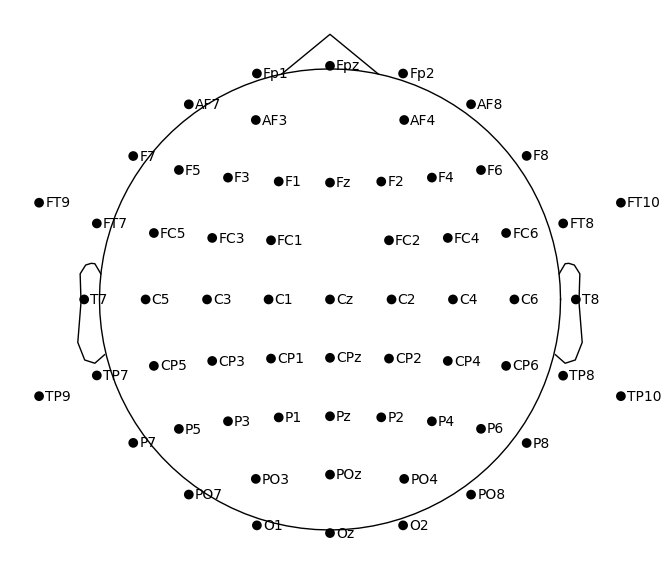

In [12]:
evoked.plot_sensors(show_names=True)

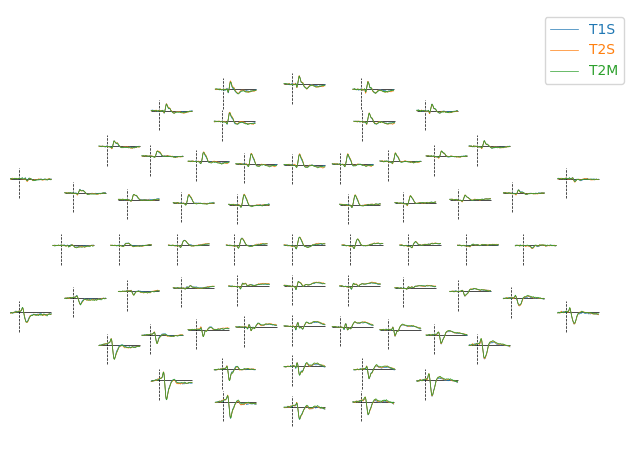

In [7]:
%matplotlib qt

title = 'MNE sample data\nleft vs right (A/V combined)'
from mne.viz import plot_evoked_topo
plot_evoked_topo(grand_average_all, legend=True)

